# Геннадий Балан


# Домашняя работа по Алгоритмам Анализа данных №2

# Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.¶

##### Задача 1
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [75]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [76]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
X[:, 1].min(), X[:, 1].max() # подготовка к нормализации второго признака

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max() # подготовка к нормализации третьего признака

(450, 2000)

In [6]:
X[:, 3].min(), X[:, 3].max() # подготовка к нормализации четвёртого признака

(1, 3)

In [193]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min()) # функция нормализации

In [8]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm                               # преобразование всех значений матрицы  в вещественные числа

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [9]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm                                         #  нормализованные значения 

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [30]:
np.logspace(-3, 2, 50)   # значения коэффициента регуляризации от 0,0001 до 100

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

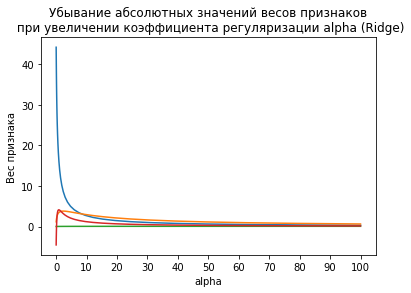

In [42]:
from sklearn.linear_model import Ridge  # импорт модели L-2 -регуляризации

n = 50

train_amount = 5   # доля обучающей выборки
train_X = X[:train_amount]   # обучающая выборка
train_y = y[:train_amount]
test_X = X[train_amount:]    # тестовая выборка
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1])) # начальные значения коэффициентов регуляризации равны нулю
alpha_list = np.logspace(-3, 2, n) # логарифмируем наш массив коэффициентов

for i, val in enumerate(alpha_list): # счётчик количества коэфициентов в нашем массиве
    ridge = Ridge(alpha=val, fit_intercept=False)  # начальные значения коэффициента регуляризации()
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()   # массив нормированных коэффициентов

for i in range(train_X.shape[1]):   # построение графиков зависимости весов от коэффициентов регуляризации
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

##### Вывод:1) Веса первого признака равны нулю при любом коэффициенте регуляризации ; 2) Значения коэффициентов регуляризации нормально распределены около нуля(гауссово распределение с колоколом у трёх признаков) ; 3) Веса стремятся к нулю при увеличении коэффициента ,то есть увеличивается штраф


##### Задача 2
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [206]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [131]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = (reg * W) / abs(W) # градиент регуляризации,используем производную от функции f(x)=|x|
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [52]:
gradient_descent_reg_l1(X_norm, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [0.44652911 1.60668934 2.44418311 0.88754685], error 3271.3752111953536
Iter: 500, weights: [43.39872547 14.26282813 12.65885543 12.51586916], error 28.775665932879956
Iter: 1000, weights: [44.03654609 15.37017552 10.71331792 12.01696564], error 27.548047896390973
Iter: 1500, weights: [44.10531637 16.51034008  9.36979595 12.18954218], error 26.91678697138287
Iter: 2000, weights: [44.11083126 17.45666899  8.22297378 12.47632993], error 26.45692060159798
Iter: 2500, weights: [44.11403518 18.22425034  7.20817046 12.79049308], error 26.112553448820385
Iter: 3000, weights: [44.1206739  18.84837151  6.30517671 13.10948126], error 25.850646764553396
Iter: 3500, weights: [44.13008382 19.35912534  5.5008071  13.4225996 ], error 25.649050222182513
Iter: 4000, weights: [44.14118781 19.78007217  4.78400547 13.72339026], error 25.492447000176323
Iter: 4500, weights: [44.15314665 20.12947384  4.14507051 14.00791045], error 25.36995598282604
Final MSE: 25.273658226943777


array([44.16534022, 20.42097561,  3.57649781, 14.27343664])

##### Задача 3
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

##### Нормализация и стандартизация выполняют схожую задачу масштабирования признаков.В целом,их применение зависит
    от поставленных задач.В задаче на градиентный спуск их применение не повлияло на кончный результат,поэтому о композиции этих методов в данном случае речь идти не должна.Но,вероятно,бывают задачи ,когда применение композиции разных методов масштабирования качественно повлияют на результат,например,в задачах классификации.Там композиция двух  и более методов может улучшить результат до 20%.Информация взята из статьи "Нормализация против стандартизации.Количественный анализ"

##### Задача 4
Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [47]:
# сгенерируем набор данных
n_features=2
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)
# возьмем нулевые начальные веса
w = np.zeros(n_features)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

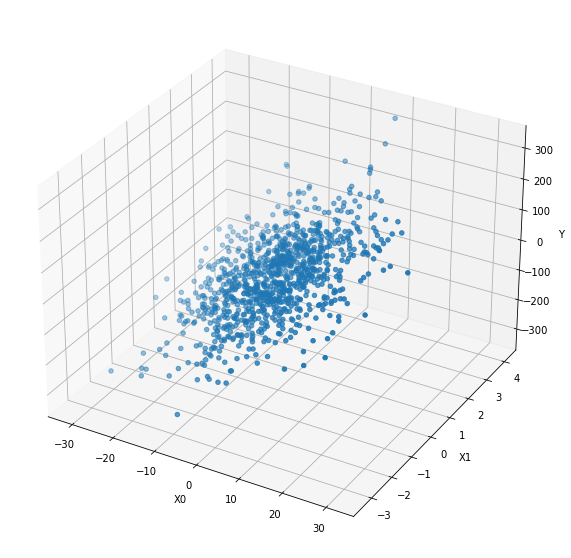

In [4]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

##### Отмасштабируем признаки методом стандартизации

In [48]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [49]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [50]:
X

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [51]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.40328590e-17,  9.54791801e-18])

array([1., 1.])

In [52]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [53]:
w # начальный вектор весов

array([0., 0.])

##### Реализация  градиентного спуска

In [54]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_1 = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error_1 = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_1.append(error_1)
    
    print(f'Iter {iter_num}: error - {error_1}, weights: {new_w}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_1[-1], 4)}')

Iter 0: error - 7875.575487546506, weights: [1.19602793 1.32362532]
Iter 1: error - 7572.617373055161, weights: [2.36877482 2.621356  ]
Iter 2: error - 7281.370891725112, weights: [3.5186938 3.8936987]
Iter 3: error - 7001.383297177433, weights: [4.64622914 5.14115015]
Iter 4: error - 6732.219345340031, weights: [5.7518165  6.36419735]
Iter 5: error - 6473.46061783745, weights: [6.83588305 7.56331779]
Iter 6: error - 6224.704871537623, weights: [7.89884763 8.7389796 ]
Iter 7: error - 5985.565413243891, weights: [8.94112097 9.89164176]
Iter 8: error - 5755.670498561099, weights: [ 9.96310576 11.02175426]
Iter 9: error - 5534.662754000114, weights: [10.96519688 12.1297583 ]
Iter 10: error - 5322.198621423354, weights: [11.94778153 13.21608644]
Iter 11: error - 5117.947823967013, weights: [12.91123936 14.28116276]
Iter 12: error - 4921.592852610136, weights: [13.85594264 15.32540306]
Iter 13: error - 4732.82847259199, weights: [14.78225639 16.349215  ]
Iter 14: error - 4551.361248910827, 

Iter 288: error - 38.66013009460125, weights: [61.22711735 67.44076061]
Iter 289: error - 38.65657850216403, weights: [61.23118786 67.44515344]
Iter 290: error - 38.65316419833443, weights: [61.23517908 67.44946037]
Iter 291: error - 38.6498818761335, weights: [61.23909256 67.4536831 ]
Iter 292: error - 38.646726433726954, weights: [61.2429298  67.45782326]
Iter 293: error - 38.6436929664968, weights: [61.24669231 67.46188247]
Iter 294: error - 38.64077675941636, weights: [61.25038152 67.46586231]
Iter 295: error - 38.63797327972181, weights: [61.25399887 67.46976435]
Iter 296: error - 38.63527816986697, weights: [61.25754577 67.47359008]
Iter 297: error - 38.63268724074984, weights: [61.26102357 67.47734102]
Iter 298: error - 38.63019646520126, weights: [61.26443363 67.48101862]
Iter 299: error - 38.627801971725404, weights: [61.26777726 67.48462431]
Iter 300: error - 38.62550003848164, weights: [61.27105576 67.48815951]
Iter 301: error - 38.623287087500216, weights: [61.2742704  67.4

Iter 567: error - 38.56825328244195, weights: [61.43520833 67.66453838]
Iter 568: error - 38.568253223046206, weights: [61.43522514 67.66455619]
Iter 569: error - 38.56825316594629, weights: [61.43524162 67.66457365]
Iter 570: error - 38.56825311105371, weights: [61.43525778 67.66459078]
Iter 571: error - 38.56825305828282, weights: [61.43527363 67.66460756]
Iter 572: error - 38.568253007551796, weights: [61.43528917 67.66462402]
Iter 573: error - 38.56825295878164, weights: [61.4353044  67.66464016]
Iter 574: error - 38.5682529118968, weights: [61.43531934 67.66465598]
Iter 575: error - 38.568252866824174, weights: [61.43533399 67.66467149]
Iter 576: error - 38.56825282349387, weights: [61.43534835 67.6646867 ]
Iter 577: error - 38.56825278183846, weights: [61.43536243 67.66470162]
Iter 578: error - 38.568252741793174, weights: [61.43537624 67.66471624]
Iter 579: error - 38.56825270329592, weights: [61.43538977 67.66473057]
Iter 580: error - 38.56825266628659, weights: [61.43540305 67

Iter 826: error - 38.56825174590868, weights: [61.43606557 67.66544428]
Iter 827: error - 38.568251745906586, weights: [61.43606568 67.66544439]
Iter 828: error - 38.56825174590447, weights: [61.43606578 67.66544449]
Iter 829: error - 38.568251745902465, weights: [61.43606588 67.6654446 ]
Iter 830: error - 38.568251745900504, weights: [61.43606597 67.6654447 ]
Iter 831: error - 38.56825174589862, weights: [61.43606607 67.6654448 ]
Iter 832: error - 38.568251745896774, weights: [61.43606616 67.6654449 ]
Iter 833: error - 38.5682517458951, weights: [61.43606625 67.66544499]
Iter 834: error - 38.568251745893406, weights: [61.43606634 67.66544508]
Iter 835: error - 38.5682517458919, weights: [61.43606643 67.66544518]
Iter 836: error - 38.568251745890294, weights: [61.43606652 67.66544527]
Iter 837: error - 38.568251745888844, weights: [61.4360666  67.66544535]
Iter 838: error - 38.5682517458874, weights: [61.43606668 67.66544544]
Iter 839: error - 38.568251745886094, weights: [61.43606676 

##### Реализация стохастического градиентного спуска

In [55]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [-0.8770491   1.16866253], MSE = 8143.11
Iteration #100: W_new = [57.29306457 59.90767571], MSE = 114.36
Iteration #200: W_new = [61.09511797 65.77858669], MSE = 42.21
Iteration #300: W_new = [61.22020165 66.88497513], MSE = 39.22
Iteration #400: W_new = [60.81127707 67.86690624], MSE = 39.01
Iteration #500: W_new = [63.01727104 68.87449656], MSE = 42.44
Iteration #600: W_new = [61.62004236 68.5922277 ], MSE = 39.45
Iteration #700: W_new = [61.34086506 68.62524345], MSE = 39.5
Iteration #800: W_new = [62.20610311 67.60795163], MSE = 39.17
Iteration #900: W_new = [62.40866111 67.70560306], MSE = 39.51
Iter 1000: error - 38.84856056035663, weights: [61.32996117 68.18159256]
В случае использования стохастического градиентного спуска ошибка составляет 38.8486
Wall time: 268 ms


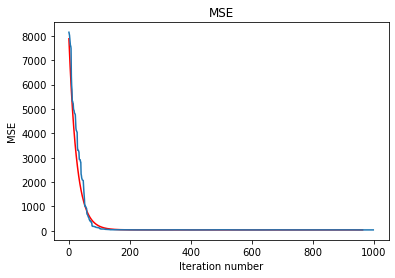

In [56]:
# Визуализируем изменение функционала ошибки
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_1)), errors_1, c='r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.plot(range(len(errors)), errors)


##### Вывод: ОБщая картина графика одинаковая-наблюдается плавный спуск средней квадратической ошибки к нулю с увеличе
нием итераций.Кривая красного цвета--обычного градиентного спуска--гладкая,кривая стохастического градиентного спуска не является гладкой и сходимость к нулю у неё быстрее